<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/Object_dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from PIL import Image
import tensorflow as tf
import os
from pathlib import Path

In [2]:
!curl -L "https://public.roboflow.com/ds/YFp7SC87Rq?key=2gm13jBLVv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: export/1478900100165707353_jpg.rf.02dae94790fe0a5fd8145e6582060381.jpg  
 extracting: export/1478900100165707353_jpg.rf.mLJlW3Cf3VoVKjXY6jgh.jpg  
 extracting: export/1478900100737478288_jpg.rf.2bb35a1222e15394de7033687f69065c.jpg  
 extracting: export/1478900100737478288_jpg.rf.nbrgBfnnhHP0mwGGKfnW.jpg  
 extracting: export/1478900101309115339_jpg.rf.2508668be11307c87ff954cf21544d10.jpg  
 extracting: export/1478900101309115339_jpg.rf.OsDb7MLdxcxdujSvvLyR.jpg  
 extracting: export/1478900101879688623_jpg.rf.81c3be06336e0ae02178f47713d58e6f.jpg  
 extracting: export/1478900101879688623_jpg.rf.v2nxcO0TVyrQn6VcGa1D.jpg  
 extracting: export/1478900102451943901_jpg.rf.4kwTUlpUEj4Jc9ubppWJ.jpg  
 extracting: export/1478900102451943901_jpg.rf.bb6b07a82d52b84fdcc5593bc581128c.jpg  
 extracting: export/1478900103022167413_jpg.rf.RQ4U0fNDAki55lA9GdEG.jpg  
 extracting: export/1478900103022167413_jpg.rf.e6e06a954b166e3767e86f06099e

In [3]:
class Box:
  def __init__(self,imgId,label,xmin,ymin,xmax,ymax):
    self.xmin = xmin
    self.ymin = ymin
    self.xmax = xmax
    self.ymax = ymax
    self.id = imgId
    self.label = label

  def area(self):
    width = self.xmax - self.xmin
    height = self.ymax - self.ymin
    return width * height

In [4]:
def intersection(box1,box2):
  area1 = box1.area()
  area2 = box2.area()
  # x Min of instersection === max(xmin between both boxes)
  intersectionXMin = max(box1.xmin,box2.xmin)
  # y Min of instersection === max(ymin between both boxes)
  intesectionYMin = max(box1.ymin,box2.ymin)
  # x Max of instersection === min(xmax between both boxes)
  intersectionXMax = min(box1.xmax,box2.xmax) 
  # y Max of instersection === min(ymax between both boxes)
  intersectionYMax = min(box1.ymax,box2.ymax)

  if intersectionXMin > intersectionXMax or intersectionYmin > intersectionYMax:
    return 0; # no intersection -> return 0

  return (intersectionXmax - intersctionXMin) * (intersectionYMax - intersectionYMin);

# Intersection over union:
def iou(box1,box2):
  i = intersection(box1,box2) # area of intesction between box1 & box2
  # area of union === area of box1 + area of box2 - intesction
  union = box1.area() + box2.area() - i 
  return i/union  

# General Intersection over union
def giou(box1,box2):
  # Area of enclosing box:
  xmin = min(box1.xmin, box2.xmin)
  xmax = max(box1.xmax,box2.xmax)
  ymin = min(box1.ymin,box2.ymin)
  ymax = max(box1.ymax,box2.ymax)
  area = (xmax - xmin) * (ymax - ymin)
  
  i = intersection(box1,box2)
  union = box1.area() + box2.area() - i 

  return i - (area - union) / area



In [5]:
box1 = Box('1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee','car',291,247,370,331)
box2 = Box('1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee','car',500,400,600,450)
print(box1.area())
print(box2.area())

6636
5000


In [6]:
print(intersection(box1,box2))

0


In [7]:
print(iou(box1,box2))

0.0


In [6]:

boxes=pd.read_csv('/content/export/_annotations.csv', sep=',')
boxes.head()

FileNotFoundError: ignored

In [6]:
%matplotlib inline

img = mpimg.imread('/content/export/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg')
print(img)

[[[122 148 173]
  [111 137 162]
  [102 128 153]
  ...
  [ 24  20  21]
  [ 42  38  39]
  [ 61  57  58]]

 [[114 140 165]
  [110 136 161]
  [107 133 158]
  ...
  [ 22  18  19]
  [ 32  28  29]
  [ 44  40  41]]

 [[106 132 157]
  [109 135 160]
  [111 137 162]
  ...
  [ 24  20  21]
  [ 25  21  22]
  [ 26  22  23]]

 ...

 [[ 14  14  14]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]

 [[ 13  13  13]
  [ 14  14  14]
  [ 15  15  15]
  ...
  [ 18  17  15]
  [ 18  17  15]
  [ 18  17  15]]]


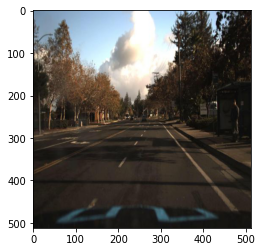

In [7]:
imgplot = plt.imshow(img)

In [ ]:


bounds = boxes.loc[boxes['filename'] == '1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg']
box0 = bounds.iloc[0]
box1 = bounds.iloc[1]
box2 = bounds.iloc[2]
box3 = bounds.iloc[3]

# Display the image
plt.imshow(Image.open('/content/export/1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg'))

# Add the patch to the Axes
plt.gca().add_patch(Rectangle((box0['xmin'],box0['ymin']),box0['xmax'] - box0['xmin'],box0['ymax'] - box0['ymin'],linewidth=1,edgecolor='r',facecolor='none'))


In [5]:
bounds = boxes.loc[boxes['filename'] == '1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg']


bounds

,filename,width,height,class,xmin,ymin,xmax,ymax
89854,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,113,240,143,271
89855,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,153,244,178,266
89856,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,154,246,179,270
89857,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,166,219,179,249
89858,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,167,216,176,242
89859,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,185,240,216,260
89860,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,211,245,235,270
89861,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,car,213,244,232,265
89862,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-Red,231,148,239,166
89863,1478020419204218613_jpg.rf.57f5ed4c26679575f46...,512,512,trafficLight-RedLeft,231,149,239,169


In [6]:
def draw_with_bounding_box(filename,boxes):
  plt.imshow(Image.open('/content/export/' + filename))
  bounds = boxes.loc[boxes['filename'] == filename]
  colors = {'car': 'lime',
            'pedestrian':'indigo',
            'trafficLight-Red':'red',
            'trafficLight-Green':'seagreen',
            'truck':'mediumpurple',
            'trafficLight':'oragnered',
            'biker':'mediumslateblue',
            'trafficLight-RedLeft':'maroon',
            'trafficLight-GreenLeft':'lawngreen',
            'trafficLight-Yello':'yellow',
            'trafficLight-YelloLeft':'khaki'}
  for i in range(len(bounds)):
    box = bounds.iloc[i]
    plt.gca().add_patch(Rectangle((box['xmin'],box['ymin']),
                                  box['xmax'] - box['xmin'],
                                  box['ymax'] - box['ymin'],
                                  linewidth=1,edgecolor=colors[box['class']],facecolor='none'))
   

draw_with_bounding_box('1478020419204218613_jpg.rf.57f5ed4c26679575f4684500b69f4223.jpg',boxes)




NameError: ignored

In [11]:
from numpy import asarray
import os
def load_imgs(path):
  data = np.empty((512,512,3))
  for filename in os.listdir(path):
    if filename.endswith(".jpg"):
      temp = mpimg.imread('/content/export/'+filename)
      #print(filename)

load_imgs('/content/export')


In [12]:
batch_size = 32
img_height = 512
img_width = 512

In [8]:
def load_dataset(dir):
  data_set = np.zeros((100,512,512,3))
  i = 0
  files = os.listdir(dir)
  for f in files:
    if f.endswith('.jpg') and i != data_set.shape[0]-1:
      temp = tf.io.read_file(dir + '/' + f)
      data = tf.image.decode_jpeg(temp,channels=3)  
      i += 1
      data_set[i] = data
  return data_set, files

In [9]:
dir = '/content/export'
data_set = np.zeros((100,512,512,3))
img_ids = []
data_set,img_ids = load_dataset(dir)

In [10]:
data_set

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [11]:
data_set = tf.cast(data_set,tf.float32)

In [13]:
img_ids

['1478898450853185140_jpg.rf.PljsxoKO7yVvasz1ARt2.jpg',
 '1478897848714641994_jpg.rf.SARSIGHRFAUxt6w2oUv0.jpg',
 '1478895836059198748_jpg.rf.119b408b5cd7aad4e61f5224730c3dbb.jpg',
 '1478898174920122246_jpg.rf.0a3bc0a4b7163f29e1390d57ef38fee4.jpg',
 '1478901456978969282_jpg.rf.gOrs3LNWcW0p8El2Se7E.jpg',
 '1478900586905748308_jpg.rf.35d418e860450cda0e7ec1df6b282c5c.jpg',
 '1478898885032628438_jpg.rf.e1d1a5549bf29cb2610e528db17909f1.jpg',
 '1478732475222419862_jpg.rf.3beb4c8cfbc70f9ab756ccabb924dbb4.jpg',
 '1478895332182866876_jpg.rf.j423whPjtu1z8J560xOQ.jpg',
 '1478900476075801138_jpg.rf.lctKxuQG8E1zviU4HeNM.jpg',
 '1478896250244390050_jpg.rf.e61f1090e828de378a5a31f5f74ff9a8.jpg',
 '1478898161779718860_jpg.rf.162a0bf0f7f8a6ebe16ed1f2ae43d0eb.jpg',
 '1478895962885546595_jpg.rf.f2b1daed3b13ae9cfe4204c2faae7a03.jpg',
 '1478896658145668848_jpg.rf.f737679d75ccdb2701cb6443b5478e7d.jpg',
 '1478897809294532018_jpg.rf.d3b910130737b47f66b7715325fe43b5.jpg',
 '1478020291199453460_jpg.rf.4cbb56d6d86